In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform

## 6

Gerando 100 amostras de dados a partir da normal $\mu = 5, \, \sigma = 1$

In [3]:
X = np.random.normal(5,1,100)

$\theta = e^5$

In [4]:
theta = np.exp(5)
print(theta)

148.4131591025766


In [5]:
def t_hat(X):
    return np.exp(np.mean(X))

In [6]:
theta_hat = t_hat(X)
print(theta_hat)

165.6144573055644


In [7]:
n = 100
B = 60

In [8]:
def bootstrap(X, f_hat):
    bootMtx = np.array([(np.random.choice(X,n)) for i in range(B)])
    bootVec = np.array([f_hat(i) for i in bootMtx])
    return bootMtx, bootVec

In [19]:
bootMtx, bootVec = bootstrap(X, t_hat)

In [20]:
np.percentile(bootVec, 97.5)

210.61439932980744

In [21]:
se = np.sqrt(np.var(bootVec))

In [22]:
alpha = 5

In [23]:
U = np.percentile(bootVec, 100-alpha/200)
L = np.percentile(bootVec, alpha/200)

In [24]:
interval = (2*theta_hat - U, 2*theta_hat - L)

In [25]:
print(f'O intervalo de {100-alpha}% de confiança é {interval}')

O intervalo de 95% de confiança é (116.43297707992207, 188.13306096086103)


[]

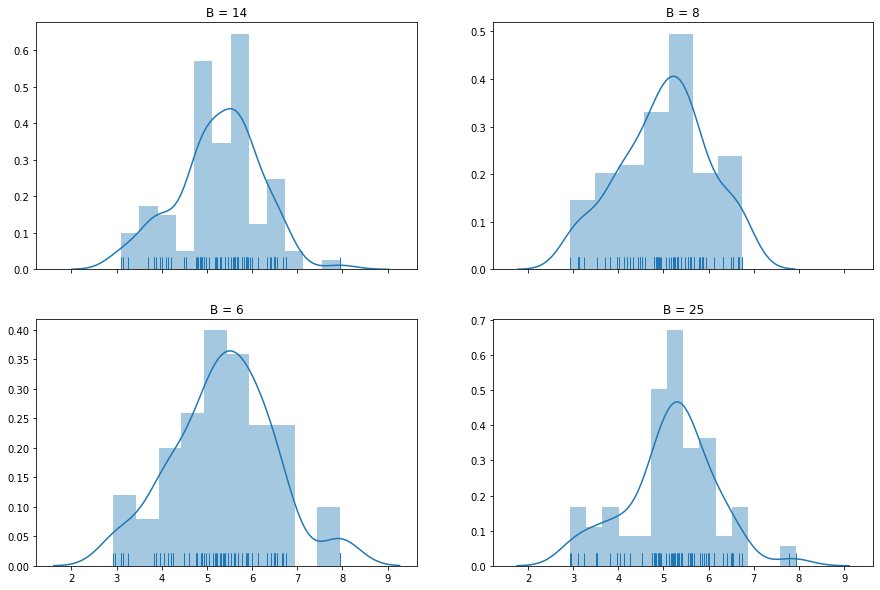

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
vecPlot = np.random.randint(0,29,4)
sns.distplot(bootMtx[vecPlot[0]], rug=True, ax = axes[0,0], label='oi')
sns.distplot(bootMtx[vecPlot[1]], rug=True, ax = axes[0,1])
sns.distplot(bootMtx[vecPlot[2]], rug=True, ax = axes[1,0])
sns.distplot(bootMtx[vecPlot[3]], rug=True, ax = axes[1,1])
axes[0,0].set_title(f'B = {vecPlot[0]}')
axes[0,1].set_title(f'B = {vecPlot[1]}')
axes[1,0].set_title(f'B = {vecPlot[2]}')
axes[1,1].set_title(f'B = {vecPlot[3]}')
plt.plot()

### Distribuição original

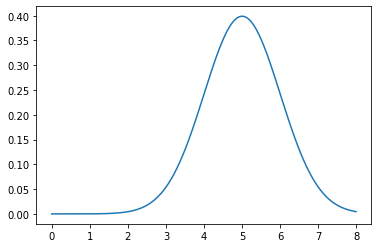

In [27]:
x_axis = np.arange(0, 8, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 5,1))
plt.show()

# 7

In [28]:
Y = np.random.uniform(0,1, 50)

In [29]:
def t_hat2(X):
    return np.max(X)

In [30]:
theta_hat2 = t_hat2(Y)

In [31]:
bootMtx_Y, bootVec_Y = bootstrap(Y, t_hat2)

[]

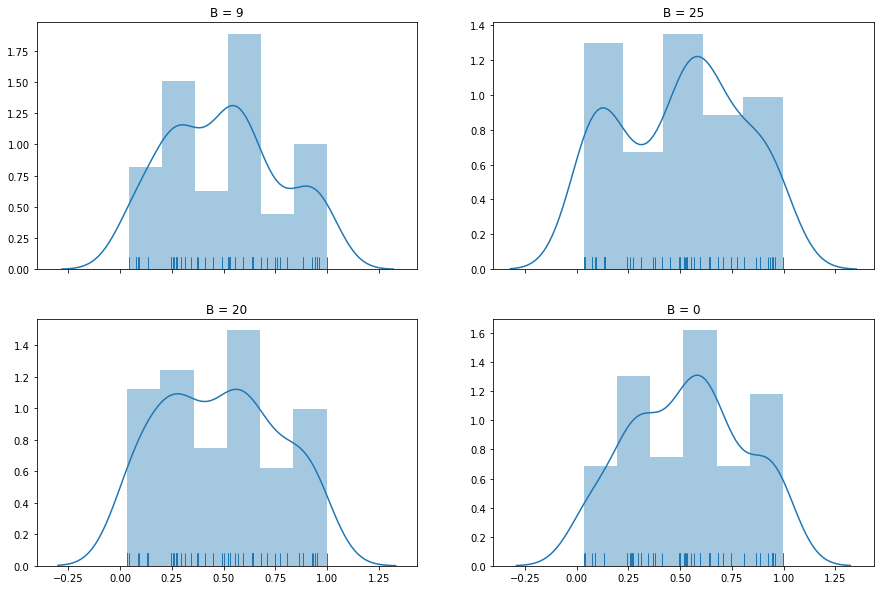

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
vecPlot = np.random.randint(0,29,4)
sns.distplot(bootMtx_Y[vecPlot[0]], rug=True, ax = axes[0,0], label='oi')
sns.distplot(bootMtx_Y[vecPlot[1]], rug=True, ax = axes[0,1])
sns.distplot(bootMtx_Y[vecPlot[2]], rug=True, ax = axes[1,0])
sns.distplot(bootMtx_Y[vecPlot[3]], rug=True, ax = axes[1,1])
axes[0,0].set_title(f'B = {vecPlot[0]}')
axes[0,1].set_title(f'B = {vecPlot[1]}')
axes[1,0].set_title(f'B = {vecPlot[2]}')
axes[1,1].set_title(f'B = {vecPlot[3]}')
plt.plot()

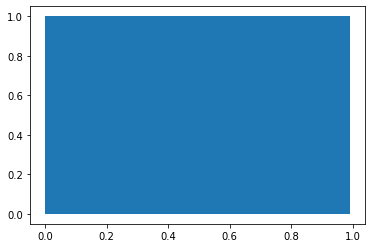

In [70]:
x_axis = np.arange(0, 1, 0.01)
plt.fill_between(x_axis, 0, uniform.pdf(x_axis, 0, 1))
plt.show()